# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Hakim Al Ikhsan
- **Email:** hakimalikhsan@gmail.com
- **ID Dicoding:** hakimalikhsan

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1

Bagaimana performa rental sepeda berdasarkan kondisi cuaca (weathersit)?

- Pertanyaan 2

Bagaimana pengaruh kelembaban terhadap penyewaan sepeda?


## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

## Data Wrangling

### Gathering Data

In [2]:
# Mengakses data csv
day = pd.read_csv('D:/BIT/SMT7/bangkit/Proyek_1/dashboard/day.csv')

# Menampilkan 5 baris pertama dataframe
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Terlihat pada data day.csv di atas, data terdiri dari beberapan komponen seperti hari, tahun, bulan, hari libur(holiday), hari kerja(weekday), dan tanggal merah(working day = 0).  

### Assessing Data

Memeriksa jumlah data yang terkategori null dan tipe data dari setiap kolom

In [3]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Insight:**
- Dari hasil di atas tidak terdapat data null dari seluruh kolom, tetapi ada kesalahan pada kolom dteday yang memiliki tipe data berupa objek, seharusnya data tanggal bertipe datetime

Menghitung data kosong di setiap kolom pada day.csv

In [4]:
day.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Insight:**
- Dari hasil di atas terlihat tidak ada data kosong dari seluruh kolom.


Memeriksa data duplikat

In [5]:
print('Banyak data duplikasi day.csv :', day.duplicated().sum())

Banyak data duplikasi day.csv : 0


Menampilkan informasi terkait statistika deskriptif

In [6]:
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Cleaning Data

- Mengubah tipe data kolom dteday dari object menjadi datetime

In [7]:
day['dteday'] = pd.to_datetime(day['dteday'])

# Mengecek kembali tipe data setiap kolom day.csv
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

Seluruh kolom dteday telah diubah tipe datanya dari object menjadi datetime

## Exploratory Data Analysis (EDA)

### Explore

- Mencari jumlah penyewaan sepeda berdasarkan cuaca (weathersit)

In [8]:
day.groupby(by='weathersit').agg({
    'cnt': 'sum',
    'casual': 'sum',
    'registered': 'sum'
})

,cnt,casual,registered
weathersit,,,
1,2257952,446346,1811606
2,996858,169776,827082
3,37869,3895,33974


- Mencari korelasi antara kelembaban dengan jumlah penyewaan sepeda

In [9]:
hum_day = {'total_rental_daily': day['cnt'], 'humidity': day['hum']}

hum_data = pd.DataFrame(hum_day)
print('Correlation Total Rental Bike')
print(hum_data.corr())

Correlation Total Rental Bike
                    total_rental_daily  humidity
total_rental_daily            1.000000 -0.100659
humidity                     -0.100659  1.000000


- Didapatkan nilai korelasi sebesar -0.100659

## Visualization & Explanatory Analysis

### Pertanyaan 1

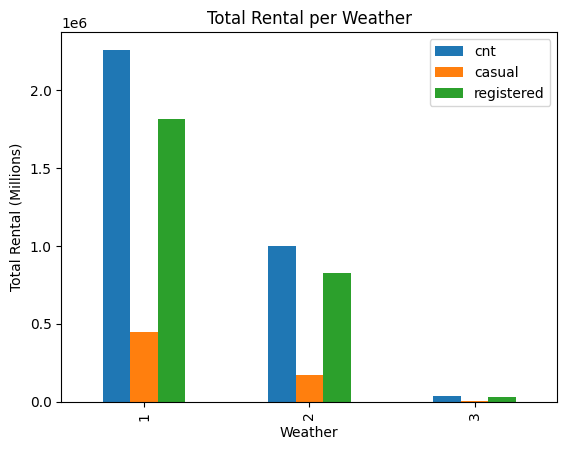

In [10]:
# Performa jumlah penyewaan sepeda per hari berdasarkan kondisi cuaca
data_tren_season = day.groupby(by='weathersit').agg({
    'cnt': 'sum',
    'casual': 'sum',
    'registered': 'sum'
})
data_tren_season.plot(kind='bar')
plt.xlabel("Weather")
plt.ylabel("Total Rental (Millions)")
plt.title("Total Rental per Weather")
plt.show()

- Dapat dilihat dari diagram batang kondisi cuaca terhadap total penyewaan sepeda di atas bahwa kondisi 1 (cuaca cerah) merupakan kondisi cuaca dengan total penyewaan sepeda paling tinggi, sedangkan kondisi 3 (hujan ringan) merupakan kondisi cuaca dengan total penyewaan sepeda paling rendah

### Pertanyaan 2

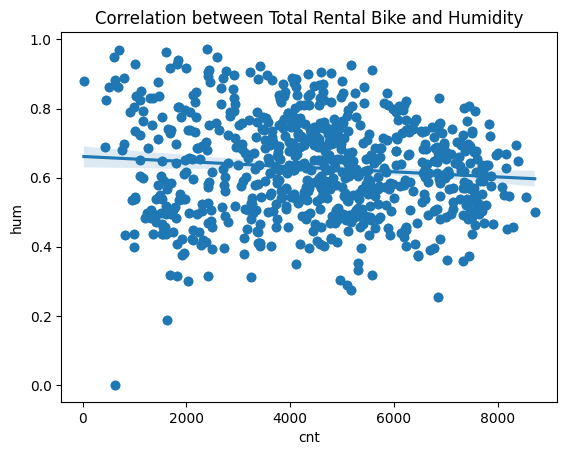

In [11]:
hum_day = {'total_rental_daily': day['cnt'], 'humidity': day['hum']}

hum_data = pd.DataFrame(hum_day)
# print('Correlation Total Rental Bike')
# print(hum_data.corr())
plt.scatter(day['cnt'], day['hum'])
plt.xlabel('Total Rental Bike')
plt.ylabel('Humidity')
plt.title('Correlation between Total Rental Bike and Humidity')
sns.regplot(x=day['cnt'], y=day['hum'])
plt.show()

- Dapat dilihat dari diagram di atas bahwa nilai korelasi antara total penyewaan sepeda per hari dengan kelembaban udara bernilai -0.100659. Besar nilai korelasi tersebut menunjukkan adanya hubungan antara total penyewaan sepeda per hari dengan kelembaban udara namun tidak cukup kuat.

## Analisis Lanjutan (Opsional)

## Conslusion

- Conclution pertanyaan 1

Performa penyewaan sepeda terbaik terjadi ketika kondisi cuaca 1 (cerah) dimana pada kondisi tersebut memiliki nilai yang paling tinggi, kemudian diikuti kondisi cuaca 2 (berkabut/berawan), kondisi cuaca 3 (hujan ringan), dan penyewaan paling sedikit terjadi pada kondisi cuaca 4 (hujan lebat).

- Conclution pertanyaan 2

Korelasi antara total penyewaan sepeda per hari dengan kelembaban udara memiliki nilai yang kecil, sehingga kelembaban udara berpengaruh kecil bagi total penyewaan sepeda per hari.